In [5]:
# IMPORT LIBRARY:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
# load the data
CC_data_raw = pd.read_csv("fraudTest.csv")

In [7]:
#lets see few rows from the data
CC_data_raw.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# Handling the data: 

In [8]:
#chech the missing values: 

CC_data_raw.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
#handling duplicate values:

CC_data_raw.drop_duplicates(inplace= True)

# Data Analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px

In [11]:
#lets set the figure size:

sns.set(rc = {'figure.figsize':(15,8)})

Transaction amount vs Fraud

In [12]:

CC_data_raw.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

Text(0.5, 1.0, 'Transection vs Fraud')

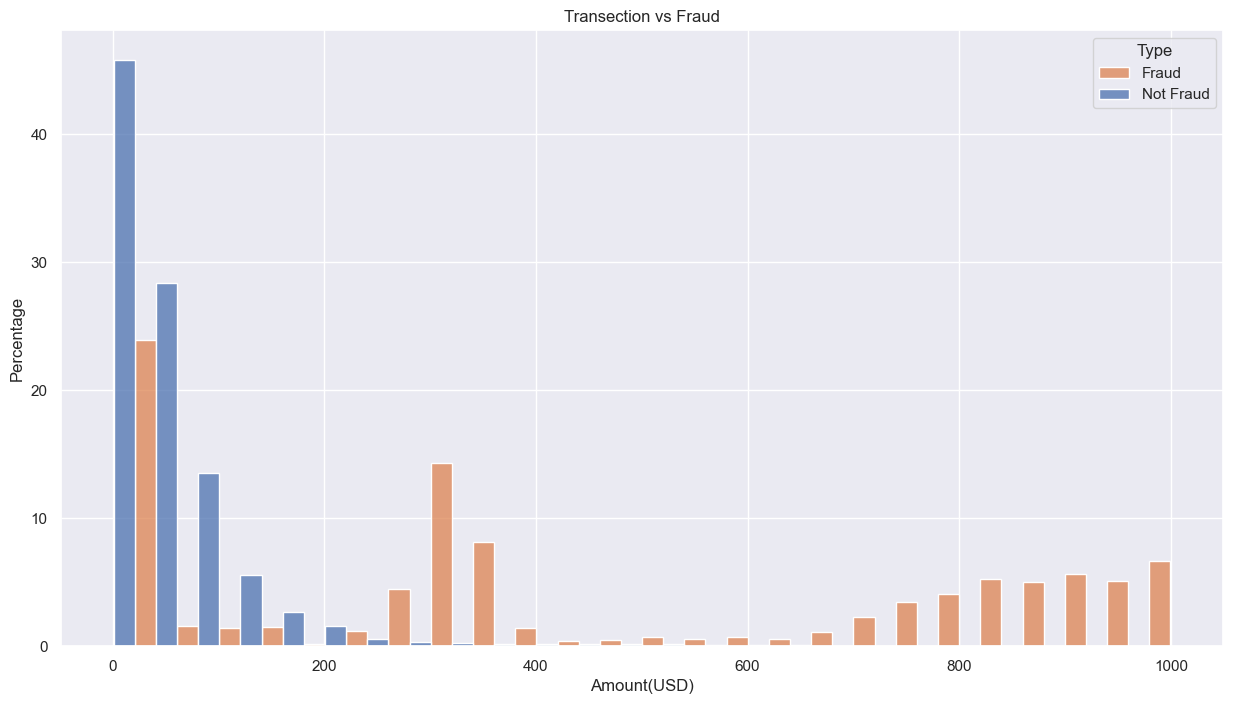

In [13]:
TvF = sns.histplot(x='amt', data=CC_data_raw[CC_data_raw.amt <= 1000], hue="is_fraud", stat="percent", multiple="dodge", common_norm=False, bins=25)
TvF.set_ylabel("Percentage")
TvF.set_xlabel("Amount(USD)")
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.title("Transection vs Fraud")

Gender vs Fraud

Text(0.5, 1.0, 'Gender vs Fraud')

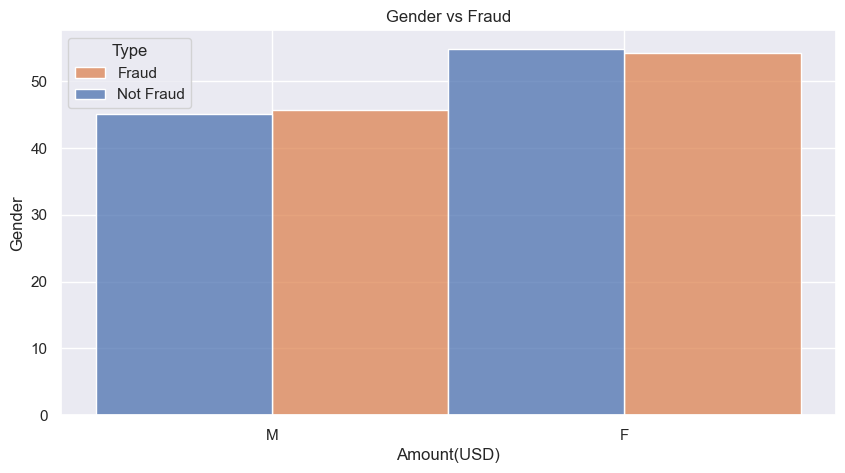

In [15]:
sns.set(rc = {'figure.figsize':(10,5)})
GvF = sns.histplot(x='gender', data=CC_data_raw, hue="is_fraud", stat="percent", multiple="dodge", common_norm=False)
GvF.set_ylabel("Gender")
GvF.set_xlabel("Amount(USD)")
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.title("Gender vs Fraud")

Age vs Fraud

In [16]:
# calculating age from the DOB given in the data
# store calculate age in new column called "age"

import datetime as dt

CC_data_raw['age'] = dt.datetime.today().year - pd.to_datetime(CC_data_raw['dob']).dt.year
print(CC_data_raw['age'])

0         57
1         35
2         55
3         38
4         70
          ..
555714    59
555715    26
555716    44
555717    60
555718    32
Name: age, Length: 555719, dtype: int32


Text(0.5, 1.0, 'Age vs Fraud')

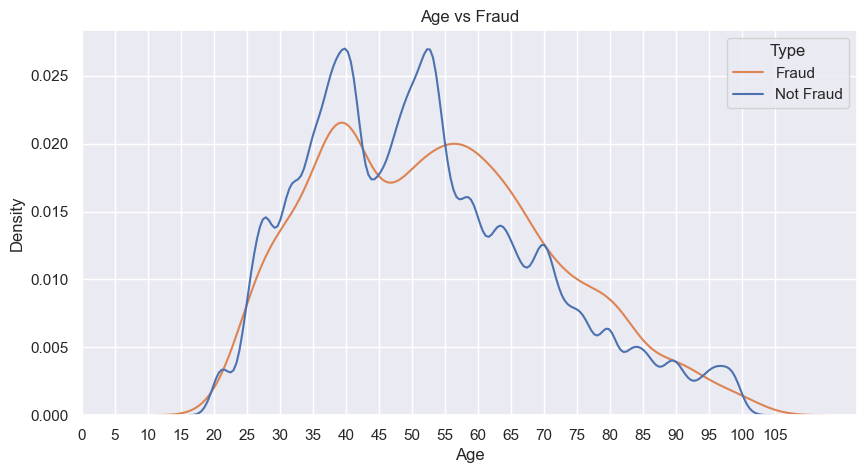

In [17]:
AvF = sns.kdeplot(x='age', data=CC_data_raw, hue="is_fraud", common_norm=False)
AvF.set_xlabel("Age")
AvF.set_ylabel("Density")
plt.xticks(np.arange(0,110,5))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.title("Age vs Fraud")

Category vs Fraud

In [18]:
print(CC_data_raw[['category','is_fraud']])

              category  is_fraud
0        personal_care         0
1        personal_care         0
2       health_fitness         0
3             misc_pos         0
4               travel         0
...                ...       ...
555714  health_fitness         0
555715       kids_pets         0
555716       kids_pets         0
555717          travel         0
555718   entertainment         0

[555719 rows x 2 columns]


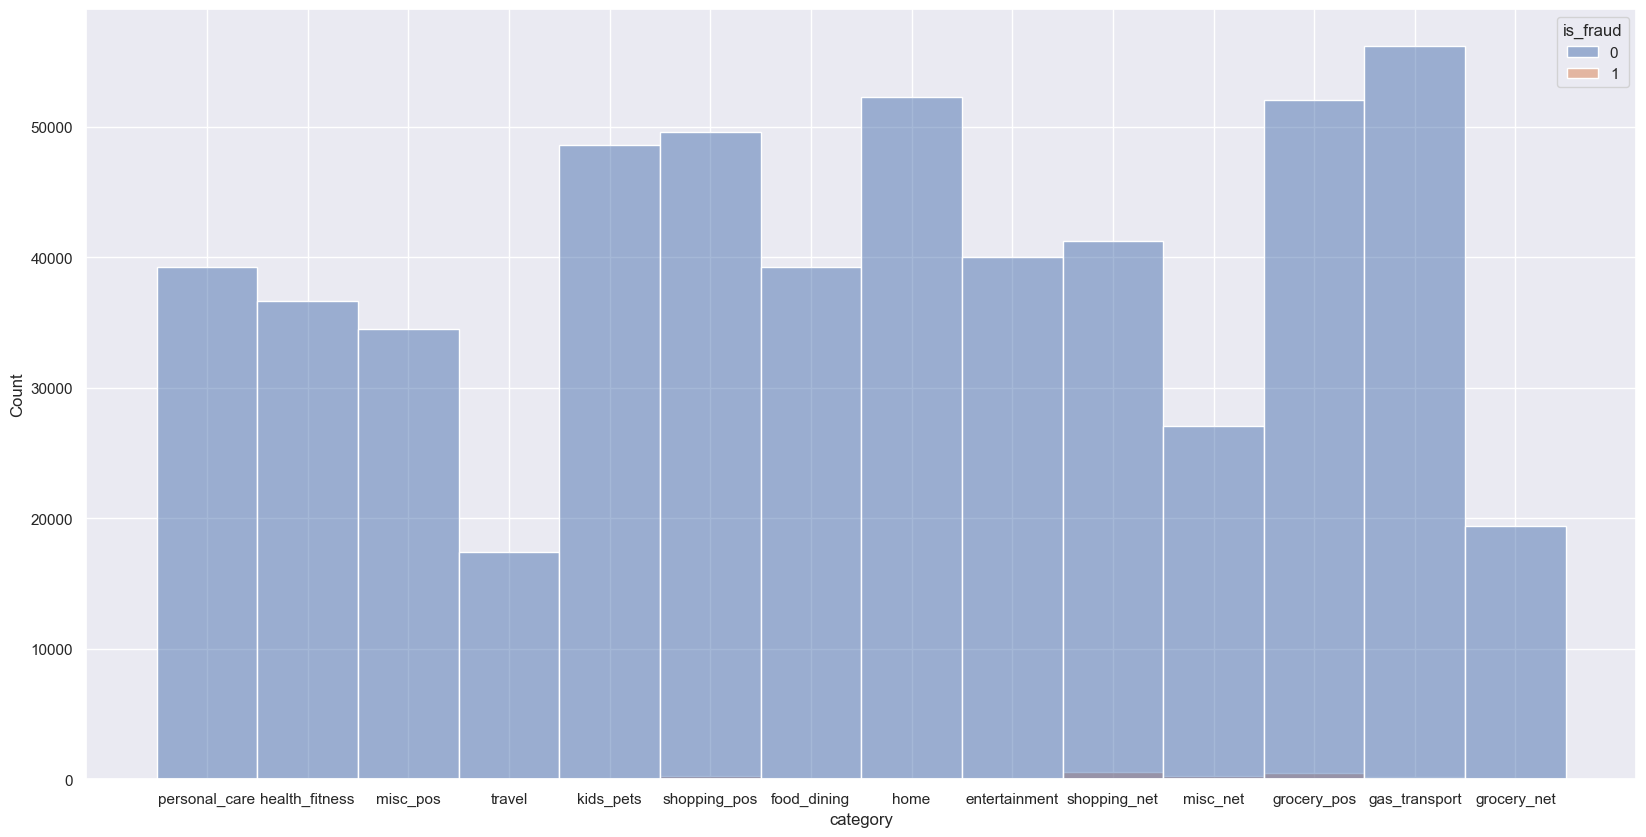

In [19]:
sns.set({'figure.figsize':(20,10)})
CvF = sns.histplot(x='category', data=CC_data_raw, hue="is_fraud", common_norm=False)

Day vs Fraud

C:\Users\anish\AppData\Local\Temp\ipykernel_29560\1550417394.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  DvF.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


Text(0, 0.5, 'Percentage')

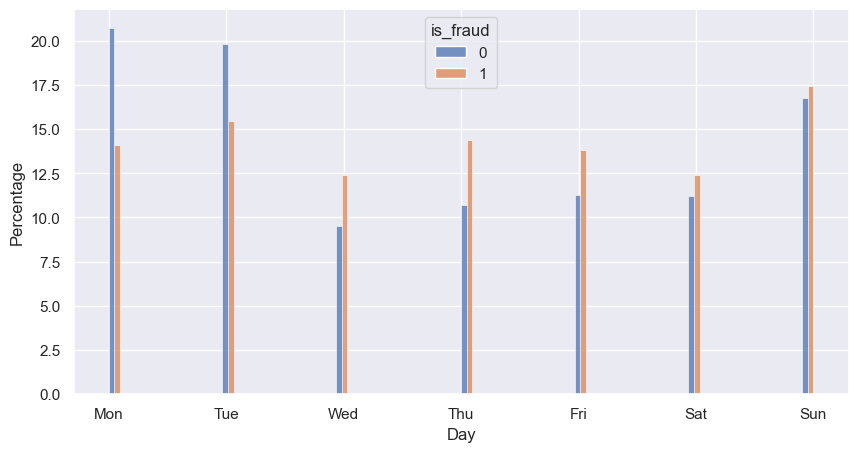

In [20]:

#convert date time to day
CC_data_raw['day'] = pd.to_datetime(CC_data_raw['trans_date_trans_time']).dt.day_of_week
# sns.set(rc={'figure:figsize':(10,5)})
sns.set(rc={'figure.figsize':(10,5)})

DvF = sns.histplot(CC_data_raw, x='day', hue='is_fraud', common_norm=False, multiple= 'dodge', stat='percent')
# DvF.set_xticklables(["", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
DvF.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
DvF.set_xlabel("Day")
DvF.set_ylabel("Percentage")

# Data Modeling

In [21]:
CC_data_raw['month'] = pd.to_datetime(CC_data_raw["trans_date_trans_time"]).dt.month
CC_data_raw['hour'] = pd.to_datetime(CC_data_raw["trans_date_trans_time"]).dt.hour
# print(CC_data_raw['month'])
# print(CC_data_raw['hour'])

In [22]:
CC_data_raw.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'age', 'day', 'month', 'hour'],
      dtype='object')

In [23]:
#create a df of data which model need to train
Train_data_raw = CC_data_raw[['category', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long','age', 'hour', 'day', 'month', 'is_fraud']]

#create dummy values out of it
Train_data = pd.get_dummies(Train_data_raw, drop_first=True)
y_train = Train_data['is_fraud'].values
X_train = Train_data.drop("is_fraud", axis='columns').values
print(y_train)
print(X_train)
print("Created training data sucessfully")

[0 0 0 ... 0 0 0]
[[2.86 29209 33.9659 ... False False False]
 [29.84 84002 40.3207 ... False False False]
 [41.28 11710 40.6729 ... False False False]
 ...
 [86.88 99323 46.1966 ... False False False]
 [7.99 83643 44.6255 ... False False True]
 [38.13 73034 35.6665 ... False False False]]
Created training data sucessfully


Adjusting testing data as the training data

In [24]:
CC_data_raw_test = pd.read_csv("fraudTest.csv")
CC_data_raw_test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [25]:

#needs to add 'age', 'hour', 'day', 'month' to the data

CC_data_raw_test['age'] = dt.datetime.today().year - pd.to_datetime(CC_data_raw_test['dob']).dt.year
CC_data_raw_test['month'] = pd.to_datetime(CC_data_raw_test["trans_date_trans_time"]).dt.month
CC_data_raw_test['hour'] = pd.to_datetime(CC_data_raw_test["trans_date_trans_time"]).dt.hour
CC_data_raw_test['day'] = pd.to_datetime(CC_data_raw_test['trans_date_trans_time']).dt.day_of_week

In [26]:
Test_data_raw = CC_data_raw_test[['category', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long','age', 'hour', 'day', 'month', 'is_fraud']]
Test_data = pd.get_dummies(Test_data_raw, drop_first=True)
y_test = Test_data['is_fraud'].values
X_test = Test_data.drop('is_fraud', axis='columns').values
print(y_test)
print(X_test)
print("adjusted testing data sucessfully")

[0 0 0 ... 0 0 0]
[[2.86 29209 33.9659 ... False False False]
 [29.84 84002 40.3207 ... False False False]
 [41.28 11710 40.6729 ... False False False]
 ...
 [86.88 99323 46.1966 ... False False False]
 [7.99 83643 44.6255 ... False False True]
 [38.13 73034 35.6665 ... False False False]]
adjusted testing data sucessfully


# Model Prediction

Logistic regression

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
method = SMOTE()
X_resample, y_resample = method.fit_resample(X_train, y_train)
model1 = LogisticRegression()
model1.fit(X_resample, y_resample)
predicted1= model1.predict(X_test)

C:\Users\anish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
print('Classification report:\n', classification_report(y_test, predicted1))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted1)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.05      0.75      0.10      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.85      0.54    555719
weighted avg       1.00      0.95      0.97    555719

Confusion matrix:
 [[524666  28908]
 [   541   1604]]
Share of Non-Fraud in Test Data: 0.9961


Random forest

In [31]:
# from sklearn.ensemble import RandomForestClassifier

In [32]:

# model2 = RandomForestClassifier(random_state=5)
# model2.fit(X_resample, y_resample)
# predicted2=model2.predict(X_test)

In [33]:
# print('Classification report:\n', classification_report(y_test, predicted2))
# conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted2)
# print('Confusion matrix:\n', conf_mat)
# print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),6))